**MACHINE LEARNING ASSIGNMENT**

**MADE BY: SHUBHAM SHARMA**

**ENROLLMENT NO: A044161823007**

**SUBMITTED TO: DR. ANU SIROHI MAM**

This is the link to my repository on github where i have uploaded the respective **dataset** on which these ML models have been executed. Also, I have uploaded the respective **i.pynb** file of the following code.

https://github.com/Charlie-6t4/Machine-Learning-Assignment

# **DECISION TREE CLASSIFIER**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn import metrics

In [3]:
# Downloading the dataset as pandas dataframe in a variable named df.
df = pd.read_csv('/content/diabetes_dataset.csv')

In [4]:
# Trying to get an overview of the data elements in the provided dataset.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Getting an overview about the dimesnions of the data set i.e. the diabetes_dataset has 768 rows and 9 columns.
df.shape

(768, 9)

In [6]:
# Getting information about the data types of each columns of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Selection of features i.e. the predictors and the target variables.
x = df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [12]:
model = dct(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


In [14]:
metrics.confusion_matrix(y_test,y_pred)

array([[88, 11],
       [20, 35]])

In [15]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



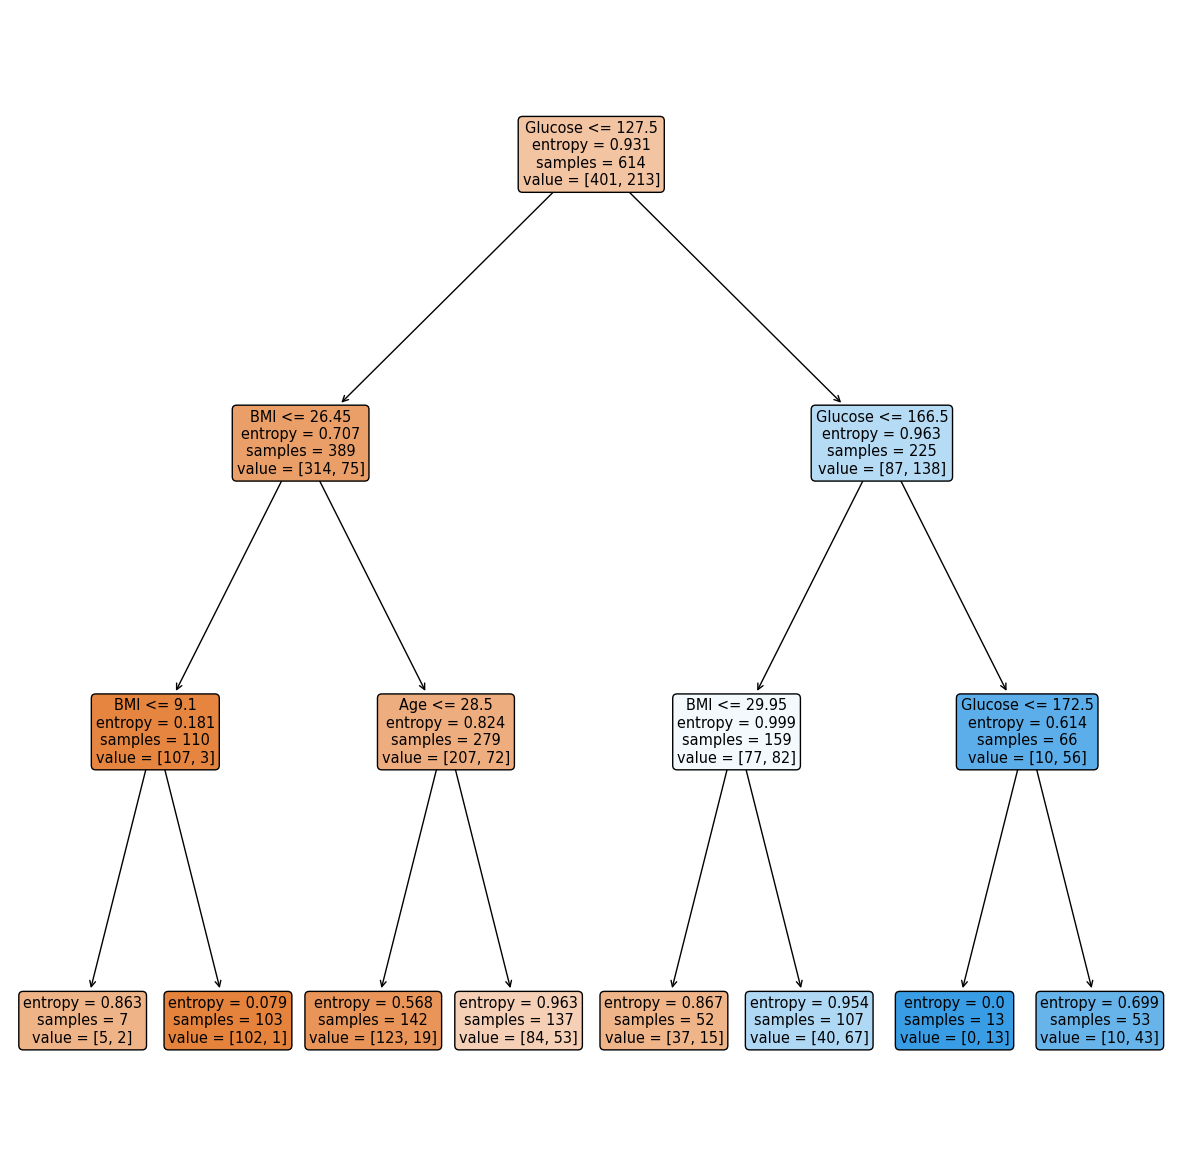

In [17]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,filled=True,rounded=True,
               feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
plt.show()

# **NAIVE BAYES CLASSIFIER**

In [20]:
from sklearn.naive_bayes import GaussianNB as GNB

In [23]:
model_nb = GNB()

# Train Naive Bayes Classifier
model_nb = model_nb.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model_nb.predict(x_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 77.27272727272727


In [25]:
metrics.confusion_matrix(y_test,y_pred)

array([[85, 14],
       [21, 34]])

In [39]:
#Evaluation using Classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



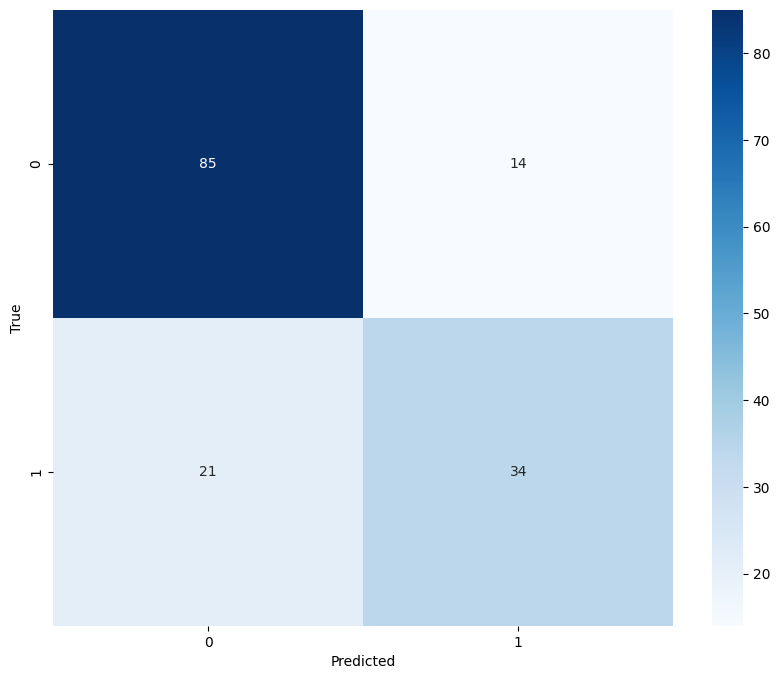

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# **SUPPORT VECTOR MACHINE**

In [31]:
from sklearn.svm import SVC

In [34]:
#Training SVM model
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 77.92207792207793


In [36]:
metrics.confusion_matrix(y_test,y_pred)

array([[89, 10],
       [24, 31]])

In [38]:
#Evaluation using Classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



# **K - Nearest Neighbour**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [42]:
# Initialize a KNN classifier
knn = KNeighborsClassifier()

In [44]:
param_grid = {'n_neighbors': range(1, 18)}

In [45]:
grid_search = GridSearchCV(knn, param_grid, cv=15, scoring='accuracy')

In [47]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 18)}, scoring='accuracy')

Best Parameter: {'n_neighbors': 16}
Best Score: 0.7329
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



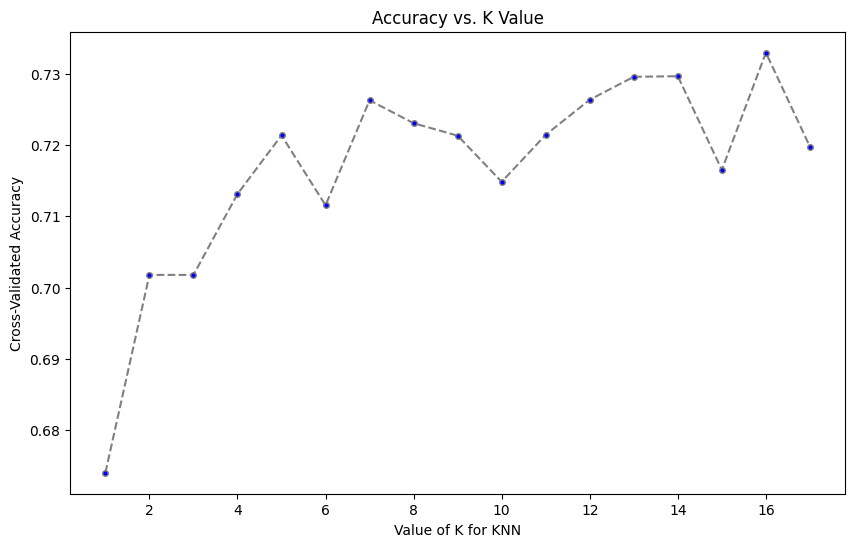

In [48]:
# Print the best parameter and best score
print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

# Use the best parameter to make predictions
knn_best = grid_search.best_estimator_
predictions = knn_best.predict(x_test)

#Evaluation using Classification report
print(classification_report(y_test,y_pred))

# Range of k we want to try
k_range = range(1, 18)

# Empty list to store scores
k_scores = []

# Loop through values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x_train, y_train, cv=15, scoring='accuracy')
    # Append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, color='grey', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=4)
plt.title('Accuracy vs. K Value')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()